In [1]:
import matplotlib.pyplot as plt
import numpy as np

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def loss(x_train,y_train,parameters):
    S=0
    A=parameters[:,0]
    B=parameters[:,1]

    for ind,x in enumerate(x_train):
        S+=(y_train[ind]-(A*x+B))**2
    return S

In [3]:
def loss_2(x_train,y_train,parameters):
    S=0
    A=parameters[0]
    B=parameters[1]

    for ind,x in enumerate(x_train):
        S+=(y_train[ind]-(A*x+B))**2
    return S

In [4]:
def init():
    num_train_point=10
    randomness=0
    instances_num=10

    x_train = np.arange(0, num_train_point, 1);
    y_train =3*np.arange(0,num_train_point,1)+randomness*np.random.rand(num_train_point)

    ##let regression line be y=Ax+B

    paras=np.random.rand(instances_num,2)
    losses=np.array([loss(x_train,y_train,paras)]).T
    instances=np.concatenate((paras,losses),axis=1)
    instances.dtype=[('A',float),('B',float),('L',float)]
    return x_train,y_train,instances


In [6]:
def train(instances):
    def reproduce(insts):
        paras=[]
        for inst1 in insts:
            for inst2 in insts:
                A=inst1[0][0]
                B=inst2[0][1]
                paras.append([A,B])
        paras=np.array(paras)
        losses=np.array([loss(x_train,y_train,paras)]).T
        new_insts=np.concatenate((paras,losses),axis=1)
        new_insts.dtype=[('A',float),('B',float),('L',float)]
        return new_insts
    def mutate(insts):
        mutate_rate=0.1
        mutate_amp=0.1
        for i in range(int(len(insts)*mutate_rate)):
            idx=np.random.randint(0,len(insts))
            A=insts[idx][0][0]
            B=insts[idx][0][1]
            mutation_A=(np.random.random()-0.5)*mutate_amp
            mutation_B=(np.random.random()-0.5)*mutate_amp
            L=loss_2(x_train,y_train,(A+mutation_A,B+mutation_B))
            insts[idx][0]=(A+mutation_A,B+mutation_B,L)

        return insts
    def select(inst):
        inst=np.sort(inst,axis=0,order='L')
        selected_instances=inst[0:10,:]
        return selected_instances
    instances=reproduce(instances)
    instances=mutate(instances)
    instances=select(instances)
    return instances

epoch 1   loss= 1109.48839888 A= 0.880113936782 B= 0.944487267636
epoch 2   loss= 1101.69290579 A= 0.883624036359 B= 0.966989725279
epoch 3   loss= 1050.89274251 A= 0.929772852673 B= 0.965507771117
epoch 4   loss= 1050.64526288 A= 0.929772852673 B= 0.966989725279
epoch 5   loss= 1012.30761104 A= 0.971759181044 B= 0.923899282799
epoch 6   loss= 992.114038094 A= 0.972706106286 B= 1.04169887307
epoch 7   loss= 963.141285225 A= 1.0080446827 B= 0.990150507162
epoch 8   loss= 942.516266683 A= 1.00844592587 B= 1.11790296446
epoch 9   loss= 913.504996075 A= 1.05383040913 B= 1.00515089096
epoch 10   loss= 855.024504421 A= 1.09257926463 B= 1.13444331051
epoch 11   loss= 826.973853889 A= 1.12652135676 B= 1.0998608257
epoch 12   loss= 805.324115857 A= 1.13680796184 B= 1.18070788659
epoch 13   loss= 784.970227099 A= 1.17229335544 B= 1.08760751844
epoch 14   loss= 769.617891567 A= 1.18652635325 B= 1.10158585517
epoch 15   loss= 727.733844118 A= 1.21457741309 B= 1.21717489938
epoch 16   loss= 714.559

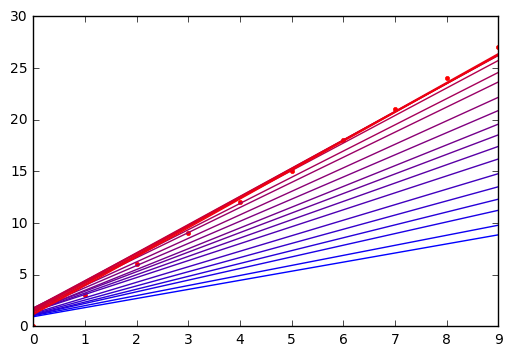

In [7]:
plt.show()

epochs=100
x_train,y_train,instances=init()
plt.plot(x_train, y_train,'r.')

for i in range(epochs):
    instances=train(instances)

    A=instances[0][0][0]
    B=instances[0][0][1]
    print('epoch '+str(i+1)+'   loss=',instances[0][0][2],'A=',A,'B=',B)
    y=A*x_train+B
    if i%5==0:    plt.plot(x_train,y,color=(float(i)/float(epochs),0,1-float(i)/float(epochs)))
    #if i==epochs-1:     plt.plot(x_train,y,'y')
plt.show()